# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [3]:
# Your code goes here
numeric_path = os.path.join(os.getcwd(),'datasets','train_auto_numeric.csv')
auto_numeric = pd.read_csv(numeric_path,delimiter=',')
print (auto_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 19.9 KB
None


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [4]:
# Your code goes here
print (auto_numeric.head(8))

   normalized-losses  wheel-base  length  width  height  engine-size  bore  \
0              164.0        99.8   176.6   66.2    54.3         8.85  3.19   
1              110.0        99.4   162.4   66.4    54.3        15.18  3.19   
2              158.0       105.8   192.7   71.4    51.6        15.18  3.94   
3              106.0        86.6   158.7   67.7    55.9        13.74  3.13   
4              192.0       101.2   176.8   64.8    54.3         8.67  3.50   
5              194.0       110.0   190.9   71.4    58.7         8.67  3.78   
6              188.0       101.2   176.8   64.8    54.3        26.58  3.31   
7              150.0       101.2   176.8   64.8    56.1        26.58  3.03   

   stroke  compression-ratio  engine-power  peak-rpm  city-mpg  highway-mpg  \
0    3.40               10.0      102000.0    5500.0      24.0         30.0   
1    3.40                8.0      115000.0    5500.0      18.0         22.0   
2    2.80                8.5       70000.0    4400.0      28

### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [5]:
# Your code goes here
print (auto_numeric.describe())

       normalized-losses  wheel-base      length       width      height  \
count         159.000000  159.000000  159.000000  159.000000  159.000000   
mean          121.955975   98.559748  171.698113   65.729560   53.925157   
std            39.434186    5.803361   12.656791    2.292021    2.410446   
min            65.000000   86.600000  141.100000   60.300000   49.400000   
25%            93.000000   94.500000  163.400000   64.000000   52.000000   
50%           110.000000   97.000000  171.700000   65.400000   54.100000   
75%           145.000000  101.200000  177.800000   66.500000   55.600000   
max           256.000000  115.600000  202.600000   71.700000   59.800000   

       engine-size        bore      stroke  compression-ratio   engine-power  \
count   159.000000  159.000000  159.000000         159.000000     159.000000   
mean     14.056352    3.294528    3.219874          10.446855   98528.301887   
std      17.143568    0.296959    0.381833           4.414796   34123.71596

### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

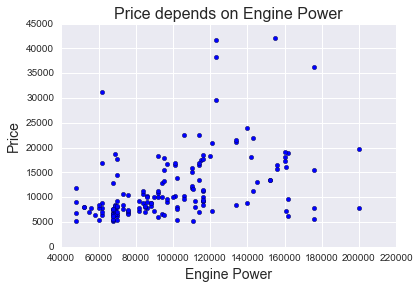

In [6]:
# Your code goes here
x_axis = auto_numeric['engine-power']
y_axis = auto_numeric['price']
plt.scatter (x_axis,y_axis)
plt.title('Price depends on Engine Power', fontsize=16)
plt.xlabel('Engine Power', fontsize=14)
plt.ylabel('Price', fontsize=14)

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*

As seen in the above plot, predicting the price of automobiles based on only engine-power might not be enough. There are automobiles which have distinct engine-power, but have the similar price(e.g.automobiles priced 10,000 have so many options in engine-power). In addition, we can also find two automobiles which have exact engine-power, but one is a lot cheaper than the other (e.g. 120,000 engine-power automobiles might be priced 30,000 or more than 40,000)

### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

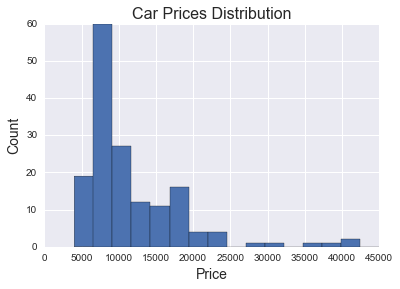

In [7]:
# Your code goes here
plt.hist(y_axis,'auto',range=(4000,45000))
plt.title('Car Prices Distribution',fontsize=16)
plt.xlabel('Price',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*
Since linear regression is really sensitive to outliers, I would try to remove some obvious outliers.


### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [8]:
# Your code goes here
X = auto_numeric['engine-power']
y = auto_numeric['price']
print (X)
print (y)

0      102000.0
1      115000.0
2       70000.0
3      140000.0
4      101000.0
5      101000.0
6      121000.0
7      134000.0
8       48000.0
9       70000.0
10      70000.0
11     176000.0
12      68000.0
13     102000.0
14     162000.0
15      68000.0
16      68000.0
17      88000.0
18     145000.0
19      58000.0
20      76000.0
21      60000.0
22      76000.0
23      76000.0
24     121000.0
25      90000.0
26      86000.0
27      86000.0
28     140000.0
29      86000.0
         ...   
129    143000.0
130    116000.0
131    116000.0
132     48000.0
133     73000.0
134     92000.0
135     92000.0
136     92000.0
137    156000.0
138    161000.0
139    156000.0
140    200000.0
141     85000.0
142     52000.0
143     85000.0
144     60000.0
145    116000.0
146    100000.0
147     90000.0
148     68000.0
149    114000.0
150    110000.0
151    114000.0
152    116000.0
153    162000.0
154    114000.0
155    160000.0
156    134000.0
157    106000.0
158    114000.0
Name: engine-power, dtyp

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [9]:
# Your code goes here
X2 = np.reshape(X,(X.shape[0],1))
print(X2.shape)

(159L, 1L)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [37]:
# Your code goes here
# Assume 80% of the data is 127 instances, and 20% of the data is 32 instances

# Take the first 127 instances
X_train_data =  X[0:127]
X_train = np.reshape(X_train_data,(X_train_data.shape[0],1))
y_train = y[0:127]

# Take the other part
X_test_data = X[128:159]
X_test = np.reshape(X_test_data,(X_test_data.shape[0],1))
y_test = y[128:159]

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [38]:
# Your code goes here
reg = LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [39]:
# Your code goes here
print ('y = ',reg.coef_,'x + ',reg.intercept_)
print ('price = ',reg.coef_,'engine-power + ',reg.intercept_)

y =  [ 0.09750227] x +  1984.68595726
price =  [ 0.09750227] engine-power +  1984.68595726


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*
Whenever one more unit of engine-power is added, the price will go up around 10% of the engine-power value. 


### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

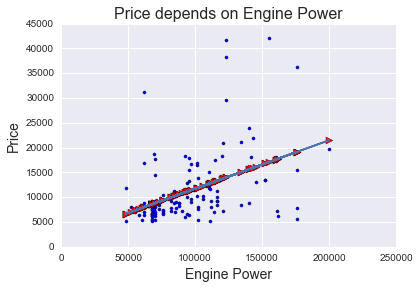

In [13]:
# Your code goes here
x_axis = X_train
y_axis = y_train
plt.scatter (x_axis,y_axis,s=10)
plt.title('Price depends on Engine Power', fontsize=16)
plt.xlabel('Engine Power', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.plot(x_axis,((x_axis*reg.coef_)+reg.intercept_))
plt.scatter (x_axis,reg.predict(X_train),marker=">",c='r',s=50)

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*
The datasets can be not randomized enough, so one subset that we hold, is actually the one that we should be used in train, in order for our model to be more precise on the test data.

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [14]:
# Your code goes here
kf = KFold(auto_numeric.shape[0],n_folds=5,shuffle=True,random_state=0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [23]:
# Your code goes here
for train_index, test_index in kf:
    #X_train_data,X_test_data = X[train_index],X[test_index]
    #y_train,y_test = y[train_index],y[test_index]
    y_train = y[train_index]
    print (y_train.mean())

11853.2677165
11635.976378
11689.8740157
11709.8267717
11535.84375


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [68]:
# Your code goes here
new_reg = LinearRegression(normalize=True) # initisalise a new LinearRegression model
predicted = cross_val_predict(new_reg,X2,y,cv=kf) #X2 : 2D array of input X
print (predicted.shape,y.shape)

(159L,) (159L,)


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [70]:
# Your code goes here
r2 = r2_score(y,predicted)

mse = mean_squared_error(y,predicted)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y,predicted)

print ('Coefficient of Determination:',r2)
print ('Root Mean Squared Error:',rmse)
print ('Mean Absolute Error:',mae)

Coefficient of Determination: 0.173005270976
Root Mean Squared Error: 6114.45211862
Mean Absolute Error: 3987.95779619


In [71]:
# correlation coefficient
mean_pred = np.mean(predicted) 
mean_y = np.mean(y)
a = predicted-mean_pred # predicted value - mean 
b = y-mean_y # target value - mean 
sd_a = a**2 
sd_b = b**2
sum_sd_a = np.sum(sd_a)
sum_sd_b = np.sum(sd_b)

dividend = np.sum(np.multiply(a,b))
divider = np.sqrt(np.multiply(sum_sd_a,sum_sd_b))
cc = (dividend/divider)*len(a)
print ('Correlation Coefficient:',cc)

Correlation Coefficient: 66.3224296478


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*



### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

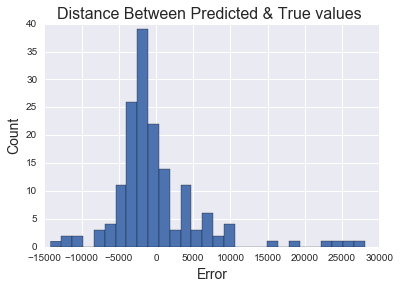

In [56]:
# Your code goes here
residuals = y - predicted
plt.hist(residuals,'auto') #range=(4000,45000)
plt.title('Distance Between Predicted & True values ',fontsize=16)
plt.xlabel('Error',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

*Your answer goes here*

Most of the datas centered near zero value,which means most of the predictions were near correct. But unfortunately, there are few which are really far away from the real value (most likely the outliers data). In conclusion, it appears like what I expected. 

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [72]:
# Your code goes here
# load the datasets into a dataframe
auto_base_path = os.path.join(os.getcwd(),'datasets','train_auto_base.csv')
auto_base = pd.read_csv(auto_base_path,delimiter=',')

# initialise a regression model
new_linreg = LinearRegression(normalize=True)
pre_x_ab = auto_base['engine-power']
x_ab = np.reshape(pre_x_ab,(pre_x_ab.shape[0],1))
y_ab = auto_base['price']
predicted_ab = cross_val_predict(new_linreg,x_ab,y_ab,cv=kf)

# evaluation reports
r2_ab = r2_score(y_ab,predicted_ab)

mse_ab = mean_squared_error(y_ab,predicted_ab)
rmse_ab = np.sqrt(mse_ab)

mae_ab = mean_absolute_error(y_ab,predicted_ab)

# correlation coefficient
mean_pred_ab = np.mean(predicted_ab) 
mean_y_ab = np.mean(y_ab)
a_ab = predicted_ab-mean_pred_ab # predicted value - mean 
b_ab = y_ab-mean_y_ab # target value - mean 
sd_a_ab = a_ab**2 
sd_b_ab = b_ab**2
sum_sd_a_ab = np.sum(sd_a_ab)
sum_sd_b_ab = np.sum(sd_b_ab)

dividend_ab = np.sum(np.multiply(a_ab,b_ab))
divider_ab = np.sqrt(np.multiply(sum_sd_a_ab,sum_sd_b_ab))
cc_ab = (dividend_ab/divider_ab)*len(a_ab)
print ('Coefficient of Determination:',r2_ab)
print ('Root Mean Squared Error:',rmse_ab)
print ('Mean Absolute Error:',mae_ab)
print ('Correlation Coefficient:',cc_ab)

Coefficient of Determination: -0.00213595381121
Root Mean Squared Error: 6730.84360395
Mean Absolute Error: 4901.86096203
Correlation Coefficient: -9.84439215336


### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

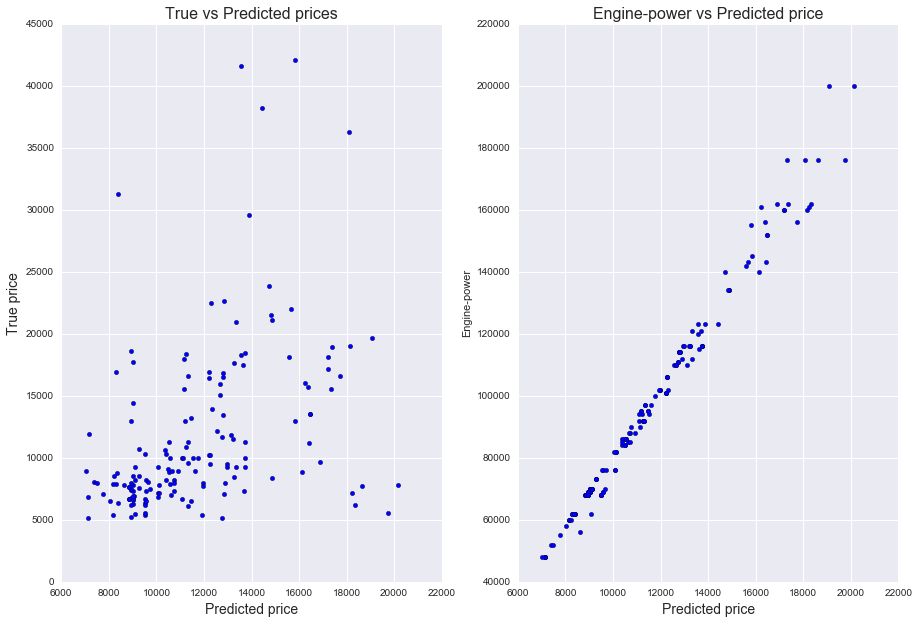

In [63]:
# Your code goes here
f = plt.figure(1)       # create a figure
f.set_figheight(10)
f.set_figwidth(15)
plt.subplot(121)    # the first subplot in the first figure, 
plt.title('True vs Predicted prices',fontsize=16)
plt.xlabel('Predicted price',fontsize=14)
plt.ylabel('True price',fontsize=14)
plt.scatter(predicted,y)

plt.subplot(122)    # second plot
plt.title('Engine-power vs Predicted price',fontsize=16)
plt.xlabel('Predicted price',fontsize=14)
plt.ylabel('Engine-power')
y_new = auto_numeric['engine-power']
plt.scatter (predicted,y_new)

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*



### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [66]:
# Your code goes here
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


*Your answer goes here*

std deviations too high,
and most of the data is not near the mean, so the dataset is not normally-distributed. In other words, there are some outliers, which then make the regression perform bad.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function useful for this question.*

In [ ]:
# Your code goes here


*Your answer goes here*



### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [ ]:
# Your code goes here


### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [ ]:
# Your code goes here


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*



### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

In [ ]:
# Your code goes here


### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*



### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

In [ ]:
# Your code goes here


### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [ ]:
# Your code goes here


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*



### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [ ]:
pd.set_option('max_columns', 30)

In [ ]:
# Your code goes here


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*


### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [ ]:
# Your code goes here


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [ ]:
# Your code goes here


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*


### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [ ]:
# Your code goes here


*Your answer goes here*
